In [1]:
#import modules 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('C:/Users/G V Swetha/Desktop/cv.csv')
df

,County Name,PercentVotingforClintonIn1992,MedianAge,MeanSavings,PerCapitaIncome,PercentInPoverty,PercentVeterans,PercentFemale,PopulationDensity,PercentInNursingHomes,CrimeIndex
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
...,...,...,...,...,...,...,...,...,...,...,...
2699,"Sheridan, WY",35.81,36.3,87232,22250,11.6,16.59,50.73,9.5,4.67,275
2700,"Sublette, WY",20.83,35.4,83020,18748,7.9,12.18,47.98,1.0,8.60,432
2701,"Sweetwater, WY",43.09,30.4,104346,19086,7.7,14.64,49.42,3.9,3.00,625
2702,"Washakie, WY",28.08,34.6,114176,17608,11.7,14.47,49.65,3.8,8.47,313


In [2]:
import pandas_profiling


eda_report = pandas_profiling.ProfileReport(df)
eda_report
eda_report.to_file('eda.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

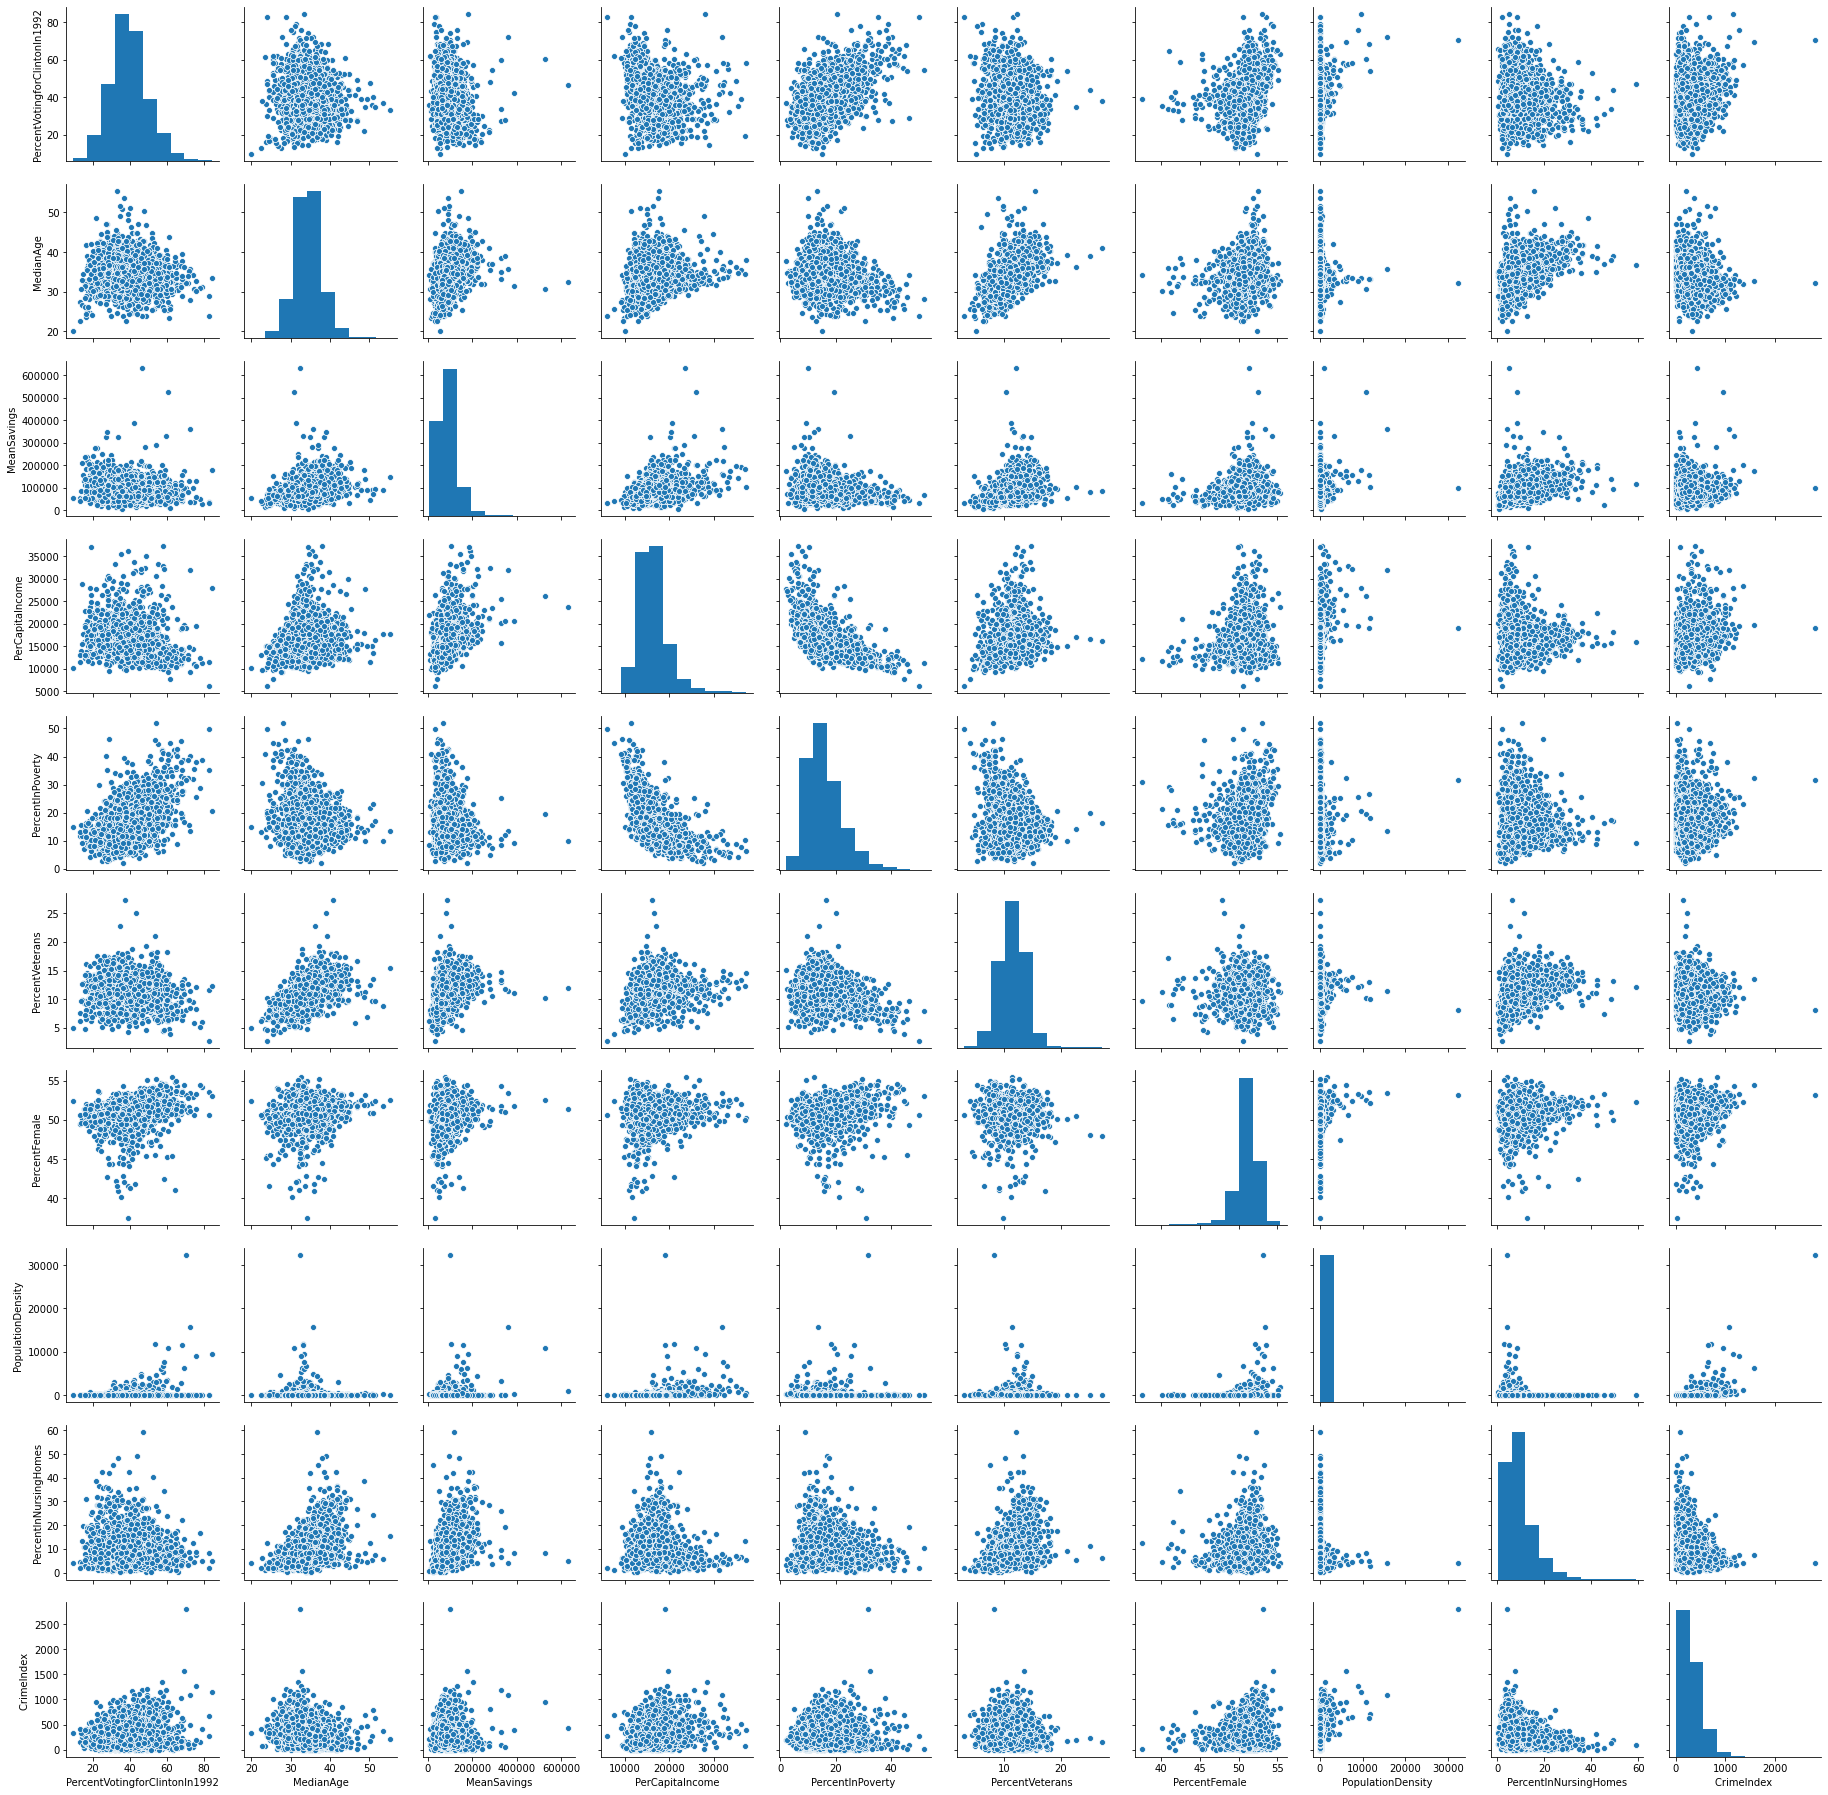

In [3]:
#Pair plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df, palette='RdYlGn')

In [4]:
x=df.corr()

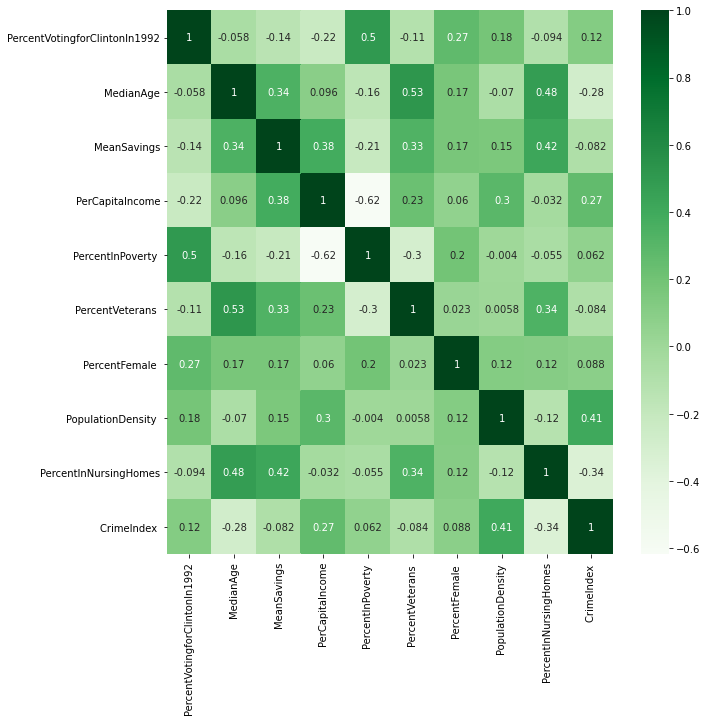

In [5]:
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap='Greens',annot = True)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   County Name                    2704 non-null   object 
 1   PercentVotingforClintonIn1992  2704 non-null   float64
 2   MedianAge                      2704 non-null   float64
 3   MeanSavings                    2704 non-null   int64  
 4   PerCapitaIncome                2704 non-null   int64  
 5   PercentInPoverty               2704 non-null   float64
 6   PercentVeterans                2704 non-null   float64
 7   PercentFemale                  2704 non-null   float64
 8   PopulationDensity              2704 non-null   float64
 9   PercentInNursingHomes          2704 non-null   float64
 10  CrimeIndex                     2704 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 232.5+ KB


In [7]:
x=df.drop(['PercentVotingforClintonIn1992','County Name'],axis=1)
y=df['PercentVotingforClintonIn1992']
x.head()
y.head()




0    30.92
1    26.24
2    46.36
3    32.92
4    67.67
Name: PercentVotingforClintonIn1992, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scld_votes= MinMaxScaler()
votes_transformed = scld_votes.fit_transform(x)
votes_transformed

scld_votes_df = pd.DataFrame(votes_transformed,columns=x.columns)
scld_votes_df.head()
#scld_votes_df.describe()

,MedianAge,MeanSavings,PerCapitaIncome,PercentInPoverty,PercentVeterans,PercentFemale,PopulationDensity,PercentInNursingHomes,CrimeIndex
0,0.330508,0.080362,0.308612,0.265469,0.324765,0.777156,0.001854,0.038553,0.163682
1,0.437853,0.124127,0.346541,0.233533,0.283558,0.773236,0.002043,0.089956,0.101003
2,0.361582,0.122078,0.301065,0.461078,0.246430,0.867861,0.000878,0.117349,0.016834
3,0.409605,0.086173,0.278295,0.261477,0.281110,0.762598,0.001916,0.038553,0.066261
4,0.330508,0.109369,0.159967,0.620758,0.175439,0.740761,0.000532,0.047853,0.050501


In [9]:
x.info

<bound method DataFrame.info of       MedianAge  MeanSavings  PerCapitaIncome  PercentInPoverty   \
0          31.7        57623            15768               15.2   
1          35.5        84935            16954               13.6   
2          32.8        83656            15532               25.0   
3          34.5        61249            14820               15.0   
4          31.7        75725            11120               33.0   
...         ...          ...              ...                ...   
2699       36.3        87232            22250               11.6   
2700       35.4        83020            18748                7.9   
2701       30.4       104346            19086                7.7   
2702       34.6       114176            17608               11.7   
2703       34.4       132959            19265                9.4   

      PercentVeterans   PercentFemale   PopulationDensity   \
0                10.74           51.41                60.4   
1                 9.73     

In [10]:
#Create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
test_y.shape
print(train_x)
print(train_y)
type(train_x)

(2028, 9)
(676, 9)
(2028,)
      MedianAge  MeanSavings  PerCapitaIncome  PercentInPoverty   \
2149       35.6        93559            13429               16.1   
1554       34.8       145479            35536                4.0   
194        37.2        75885            16919               12.0   
189        34.8        72064            22928               10.4   
1509       31.6        77339            16255               10.6   
...         ...          ...              ...                ...   
1731       32.0        86692            18761                9.9   
763        35.5        98138            17467               13.3   
835        38.5       327740            15795               10.5   
1653       39.3        87466            12188               18.5   
2607       33.4        97256            12415               25.5   

      PercentVeterans   PercentFemale   PopulationDensity   \
2149              9.10           51.85                42.5   
1554             11.92          

pandas.core.frame.DataFrame

In [11]:
#Create instance of model 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

print(lm)


LinearRegression()


In [12]:
lm.fit(train_x,train_y)

LinearRegression()

In [13]:
predict_test=lm.predict(test_x)

In [14]:
#Evaluate the model performance by passing Actual values of test data and predicted values of test data 

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) for test data is")
np.round(mean_absolute_error(test_y,predict_test),2)

Mean Absolute Error(MAE) for test data is


6.62

In [15]:
coeff_df= pd.DataFrame({'features':x.columns,'coeff':lm.coef_})
coeff_df=coeff_df.sort_values(by=['coeff'])
coeff_df

,features,coeff
7,PercentInNursingHomes,-0.123997
8,CrimeIndex,-0.001391
1,MeanSavings,-0.000027
2,PerCapitaIncome,0.000142
6,PopulationDensity,0.001546
0,MedianAge,0.014070
4,PercentVeterans,0.322634
3,PercentInPoverty,0.744684
5,PercentFemale,1.275626


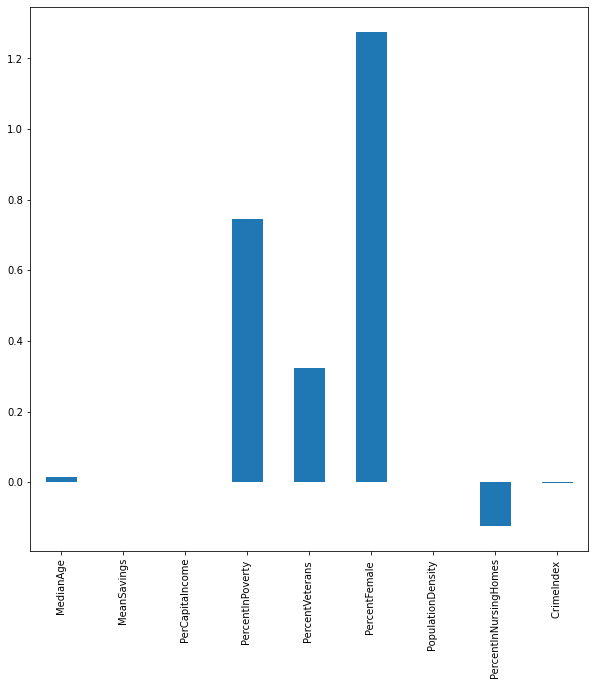

In [17]:
plt.figure(figsize=(10,10))
ft_importance=pd.Series(lm.coef_, index=x.columns)

ft_importance.plot(kind='bar')
plt.show()

In [21]:
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=np.abs(fdf['PercentVotingforClintonIn1992']-fdf['Predicted'])
fdf.sample(30)
fdf.describe()


,MedianAge,MeanSavings,PerCapitaIncome,PercentInPoverty,PercentVeterans,PercentFemale,PopulationDensity,PercentInNursingHomes,CrimeIndex,PercentVotingforClintonIn1992,Predicted,Prediction_Error
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,34.431805,87671.291420,16257.128698,16.227515,11.394216,51.016672,191.182396,9.222500,291.343195,40.065207,39.728254,6.615976
std,3.475831,36502.950917,3396.654421,6.582616,2.284338,1.379026,824.314693,5.681233,202.050307,10.278084,5.532628,5.207780
min,22.600000,22046.000000,6118.000000,2.600000,2.780000,41.870000,0.600000,0.190000,1.000000,12.940000,26.400000,0.010000
25%,32.600000,63394.250000,14059.500000,11.575000,9.920000,50.370000,20.000000,5.227500,142.000000,33.177500,35.900000,2.575000
50%,34.300000,82128.500000,15762.000000,15.350000,11.335000,51.160000,42.750000,7.755000,256.500000,39.600000,38.900000,5.375000
75%,36.200000,103899.000000,17836.250000,19.600000,13.000000,51.860000,108.925000,11.880000,392.250000,46.825000,42.900000,9.260000
max,53.600000,360313.000000,37070.000000,52.000000,22.710000,54.520000,15621.000000,35.160000,1171.000000,84.640000,67.400000,32.160000


In [19]:
lm.intercept_

-40.32022560445053

In [ ]:
np.round(lm.score(train_x,train_y)*100,0)

In [ ]:
np.round(lm.score(test_x,test_y)*100,0)

In [29]:
#Implementation after review 
#Only test_x data has been reverse transformed 

test_x= pd.DataFrame(scld_votes.inverse_transform(scld_votes_df),columns=x.columns)
test_x.head()
test_x.describe()
predict_test=lm.predict(test_x)

In [30]:
fdf=pd.concat([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error']=np.abs(fdf['PercentVotingforClintonIn1992']-fdf['Predicted'])
fdf.sample(30)
fdf.describe()



,MedianAge,MeanSavings,PerCapitaIncome,PercentInPoverty,PercentVeterans,PercentFemale,PopulationDensity,PercentInNursingHomes,CrimeIndex,PercentVotingforClintonIn1992,Predicted,Prediction_Error
count,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,676.000000,2704.000000,676.000000
mean,34.444527,89939.367234,16389.286612,16.079993,11.422685,51.002533,195.236391,9.476124,304.492234,40.065207,39.526072,6.615976
std,3.534576,41462.182192,3378.824446,6.658371,2.306871,1.472173,941.707347,6.283713,217.101571,10.278084,5.713194,5.207780
min,20.000000,7472.000000,6118.000000,1.900000,2.780000,37.530000,0.400000,0.080000,0.000000,12.940000,23.900000,0.010000
25%,32.475000,62983.000000,14202.000000,11.400000,9.850000,50.400000,19.375000,5.150000,149.000000,33.177500,35.600000,2.575000
50%,34.300000,83273.500000,15943.000000,14.900000,11.440000,51.130000,44.000000,7.875000,260.500000,39.600000,38.800000,5.375000
75%,36.400000,107890.000000,17873.000000,19.400000,13.002500,51.850000,108.500000,11.922500,411.000000,46.825000,42.525000,9.260000
max,55.400000,631534.000000,37387.000000,52.000000,27.290000,55.390000,32360.300000,59.220000,2792.000000,84.640000,99.800000,32.160000
